In [125]:
#Perceptrons
import os
import numpy as np
import matplotlib.pyplot as plt
import random
# Functions that might be useful (please read the documentation)
# x.flatten() (take a N-dimensional numpy array and make it one-dimensional)
# numpy.random.choice -- choose from the list of images
# numpy.dot -- compute the dot product
# numpy.random.normal -- set up random initial weights

DIM = (28,28) #these are the dimensions of the image

def load_image_files(n, path="images/"):
    # helper file to help load the images
    # returns a list of numpy vectors
    images = []
    for f in os.listdir(os.path.join(path,str(n))): # read files in the path
        p = os.path.join(path,str(n),f)
        if os.path.isfile(p):
            i = np.loadtxt(p)
            assert i.shape == DIM # just check the dimensions here
            # i is loaded as a matrix, but we are going to flatten it into a single vector
            images.append(i.flatten())
    return images
            

# Load up these image files
A = load_image_files(0)
B = load_image_files(1)

N = len(A[0]) # the total size
assert N == DIM[0]*DIM[1] # just check our sizes to be sure

# set up some random initial weights
weights = np.random.normal(0,1,size=N)

Problem 1

In [126]:
def perceptron_prediction(w,x):
    dot_product = np.dot(w,x)
    if dot_product >= 0:
        return 1
    else:
        return 0

In [127]:
avg_acc = []
np.random.shuffle(A)
np.random.shuffle(B)
combined = A + B #all the files
index_A = 0
index_B = 0
for i in np.arange(1000):
    count_correct = 0
    for j in np.arange(25):
        y = np.random.randint(2)
        if (y == 0):
            #x = random.choice(A)
            #x = combined[index_A]
            #index_A+=1
            index = random.randint(0,len(A))
            x = combined[index]
            pred = perceptron_prediction(weights, x)
            if (pred == 1):
                weights -= x
            else: 
                count_correct += 1
        else:
            #x = random.choice(B)
            #print(index_B+len(A))
            #x = combined[index_B+len(A)]
            #index_B += 1
            index = random.randint(len(A)-1,len(combined)-1)
            #print(index)
            x = combined[index]
            pred = perceptron_prediction(weights, x)
            if (pred == 0):
                weights += x
            else:
                count_correct +=1 
    acc = count_correct/25
    avg_acc = np.append(avg_acc, acc)

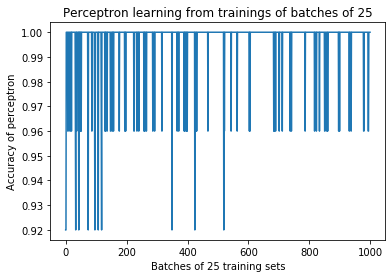

In [128]:
plt.plot(avg_acc)
plt.xlabel('Batches of 25 training sets')
plt.ylabel('Accuracy of perceptron')
plt.title('Perceptron learning from trainings of batches of 25')
plt.show()

Problem 2

It does seem to converge to 100% accuracy. With more trials, you'd see a similar pattern. This indicates that using these dimensions provided to classify between 0 and 1, this perceptron prediction algorithm is fairly accurate when distinguishing 0 and 1.

Problem 3

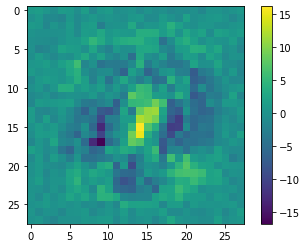

In [129]:
altered_weights = np.reshape(weights, (28,28)) #weights assigned to each pixel in image
plt.imshow(altered_weights)
plt.colorbar()

This graph represents the weights of each pixel in an image. These different colors represent where it is common to have a 1 and a 0. For example, a 1 commonly appears in the space in the light areas (large positive values) and a 0 commonly appears in the space in dark areas (large negative values). When the weights are adjusted, if they need to be adjusted towards a 0, the weights are subtracted from, but if they need to be adjusted towards a 1, they are added to.

Numbers near zero mean that 0s and 1s are both nearly as likely to appear in that space and therefore that pixels in those areas aren't significant in distinguishing 0 or 1 in an image.

Large positive values are located where a 1 would commonly appear in an image, and large negative values are located where a 0 would commonly appear in an image.

Problem 4

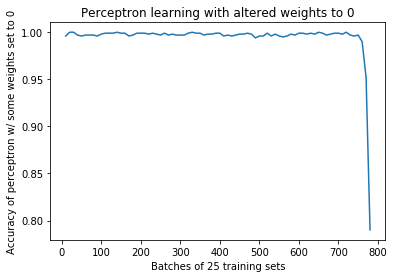

In [130]:
#78 times, take absolute value of all the weights in weight vector and find the smallest ones and
#change these to 0.
#1000 random images every time I change the weights
#no other changes to weights
avg_acc = []
acc = 0
zero_weights = weights
abs_weights = abs(weights)
sorted_weights = sorted(abs_weights)

for i in np.arange(10,790,10):
    #how many weight vals to turn to 0
    #count_weight_vals = 0
    count_correct = 0
    max_min_val = sorted_weights[i] #the maximum of the i smallest numbers
    for weight in np.arange(len(weights)):
        #if count_weight_vals <= num_weight_vals:
        abs_weight = abs(weights[weight])
        if abs_weight <= max_min_val:
            zero_weights[weight] = 0 
            #num_weight_vals -= 1
            
    for j in np.arange(1000):
        #count_correct = 0
        y = np.random.randint(2)
        if (y == 0):
            index = random.randint(0,len(A))
            x = combined[index]
            pred = perceptron_prediction(zero_weights, x)
            if pred == 0:
                count_correct += 1
        else:
            index = random.randint(len(A)-1,len(combined)-1)
            x = combined[index]
            pred = perceptron_prediction(zero_weights, x)
            if pred == 1:
                count_correct +=1 
    acc = count_correct/1000
    avg_acc = np.append(avg_acc, acc)
    
plt.plot(np.arange(10,790,10),avg_acc)
plt.xlabel('Batches of 25 training sets')
plt.ylabel('Accuracy of perceptron w/ some weights set to 0')
plt.title('Perceptron learning with altered weights to 0')
plt.show()

I don't think there would be much change in resetting weight values that are close to zero to actually be zero. This does seem to be the case as seen in the above graph; the accuracy of the perceptron does not change much with the weights altered in this way. Therefore pixels with these values do not contribute to the perceptron's ability to classify correctly between 0 and 1. The graph declines rapidly when almost done with all the data, but since it does so at the very end, the truly important part is the accuracy up until then.

Problem 5

In [131]:
#count = 1 #count for pairing
num_0 = load_image_files(0)
num_1 = load_image_files(1)
num_2 = load_image_files(2)
num_3 = load_image_files(3)
num_4 = load_image_files(4)
num_5 = load_image_files(5)
num_6 = load_image_files(6)
num_7 = load_image_files(7)
num_8 = load_image_files(8)
num_9 = load_image_files(9)
#nums = num_0 + num_1 + num_2 + num_3 + num_4 + num_5 + num_6 + num_7 + num_8 + num_9
nums = [num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9]

#matrix = np.zeros((10,10))
def pairs(start_num,end_num):
    weights = np.random.normal(0,1,size=N)
    avg_acc = []
    for i in np.arange(500):
        count_correct = 0
        for j in np.arange(25):
            y = np.random.randint(2)
            if (y == 0):
                #index = random.randint(0,len(A))
                #x = combined[index]
                x = random.choice(nums[i])
                pred = perceptron_prediction(weights, x)
                if (pred == 1):
                    weights -= x
                else: 
                    count_correct += 1
            else:
                #index = random.randint(len(A)-1,len(combined)-1)
                #x = combined[index]
                print(j)
                x = random.choice(nums[j])
                pred = perceptron_prediction(weights, x)
                if (pred == 0):
                    weights += x
                else:
                    count_correct +=1 
    acc = count_correct/25
    avg_acc = np.append(avg_acc, acc)
    #matrix[i][j] = acc
    #matrix[j][i] = acc
    #return matrix
    return max(avg_acc)

total_acc = []
for i in np.arange(10):
    row_acc = []
    for j in np.arange(10):
        row_acc.append(pairs(i,j))
    
    total_acc.append(row_acc)
    
for i in np.arange(10):
    for j in np.arange(10):
        if i == j:
            total_acc[i][j] = 1
plt.imshow(total_acc)
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.colorbar()
total_acc

0
1
2
3
4
5
6
7
8
9
12


IndexError: list index out of range

I would expect that numbers that resemble each other would be harder classify against one another than ones that do not resemble each other. For example, I think 9 and 0 could be hard to decipher but 1 and 0 would be less hard. The map shown above does match these intuitions because the dark pixels of the matrix represent the numbers (row and column ie. 8 and 3) that are the most difficult to tell apart, but the light pixels like row 4 column 8 are more differentiable.